In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('filght_ml.csv')

In [3]:
df.head()

,from,to,flightType,price,time,distance,agency,date,day,day_name,month,year
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,26,Thursday,9,2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,30,Monday,9,2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,3,Thursday,10,2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,4,Friday,10,2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,10,Thursday,10,2019


# preprocessing

In [4]:
# we will delete columns that we don't need it any more 
df.drop(columns=['date','day_name'],inplace=True)

In [5]:
df.head()

,from,to,flightType,price,time,distance,agency,day,month,year
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,26,9,2019
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,30,9,2019
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,3,10,2019
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,4,10,2019
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10,10,2019


<Axes: >

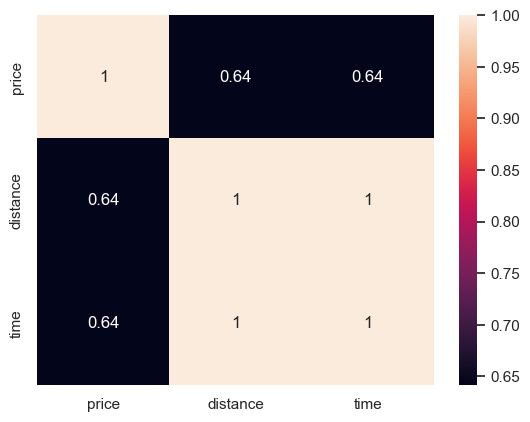

In [6]:

sns.heatmap(df[['price','distance','time']].corr(),annot=True)

In [7]:
df.drop(columns='time',inplace=True)

In [8]:
for i in df.select_dtypes('O').columns:
    print(i,'----',df[i].nunique())

from ---- 9
to ---- 9
flightType ---- 3
agency ---- 3


In [9]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [10]:
binary = BinaryEncoder()

In [11]:
from_to = binary.fit_transform(df.select_dtypes('O'))
from_to

,from_0,from_1,from_2,from_3,to_0,to_1,to_2,to_3,flightType_0,flightType_1,agency_0,agency_1
0,0,0,0,1,0,0,0,1,0,1,0,1
1,0,0,1,0,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,1,1,0,1,1,0
4,0,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271883,0,1,1,0,0,0,0,1,0,1,1,0
271884,0,0,1,0,1,0,0,0,1,0,1,0
271885,1,0,0,0,0,0,0,1,1,0,1,0
271886,0,0,1,0,1,0,0,1,1,0,1,0


In [12]:
new = pd.concat([from_to,df.select_dtypes('number')],axis=1)
new

,from_0,from_1,from_2,from_3,to_0,to_1,to_2,to_3,flightType_0,flightType_1,agency_0,agency_1,price,distance,day,month,year
0,0,0,0,1,0,0,0,1,0,1,0,1,1434.38,676.53,26,9,2019
1,0,0,1,0,0,0,1,0,0,1,0,1,1292.29,676.53,30,9,2019
2,0,0,1,1,0,0,0,1,0,1,1,0,1487.52,637.56,3,10,2019
3,0,0,1,0,0,0,1,1,0,1,1,0,1127.36,637.56,4,10,2019
4,0,1,0,0,0,1,0,0,0,1,1,0,1684.05,830.86,10,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,0,1,1,0,0,0,0,1,0,1,1,0,1446.34,573.81,12,7,2020
271884,0,0,1,0,1,0,0,0,1,0,1,0,726.95,709.37,16,7,2020
271885,1,0,0,0,0,0,0,1,1,0,1,0,873.07,709.37,20,7,2020
271886,0,0,1,0,1,0,0,1,1,0,1,0,313.62,466.30,23,7,2020


In [13]:
X= new.drop(columns='price',axis=1)
X

,from_0,from_1,from_2,from_3,to_0,to_1,to_2,to_3,flightType_0,flightType_1,agency_0,agency_1,distance,day,month,year
0,0,0,0,1,0,0,0,1,0,1,0,1,676.53,26,9,2019
1,0,0,1,0,0,0,1,0,0,1,0,1,676.53,30,9,2019
2,0,0,1,1,0,0,0,1,0,1,1,0,637.56,3,10,2019
3,0,0,1,0,0,0,1,1,0,1,1,0,637.56,4,10,2019
4,0,1,0,0,0,1,0,0,0,1,1,0,830.86,10,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,0,1,1,0,0,0,0,1,0,1,1,0,573.81,12,7,2020
271884,0,0,1,0,1,0,0,0,1,0,1,0,709.37,16,7,2020
271885,1,0,0,0,0,0,0,1,1,0,1,0,709.37,20,7,2020
271886,0,0,1,0,1,0,0,1,1,0,1,0,466.30,23,7,2020


In [14]:
y=df['price']
y

0         1434.38
1         1292.29
2         1487.52
3         1127.36
4         1684.05
           ...   
271883    1446.34
271884     726.95
271885     873.07
271886     313.62
271887     533.69
Name: price, Length: 271888, dtype: float64

In [15]:
sc = StandardScaler()

In [16]:
# X = sc.fit_transform(X)
# X

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [18]:
# X_train= sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [19]:
pca = PCA(n_components=3)

In [20]:
# X_train = pca.fit_transform(X_train)
# X_test  = pca.fit_transform(X_test)

In [21]:
poly = PolynomialFeatures(degree=3)

In [22]:
X_train = poly.fit_transform(X_train)
X_test  =poly.fit_transform(X_test)

In [23]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [24]:
svm = SVR()

In [25]:
# svm.fit(X_train,y_train)

In [26]:
liner = LinearRegression()

In [27]:
liner.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred_ = liner.predict(X_train)
y_ts = liner.predict(X_test)

In [29]:
print(f'test {mean_squared_error(y_true=y_train,y_pred=y_pred_)}')
print(f'test {mean_squared_error(y_true=y_test,y_pred=y_ts)}')

test 656.5233920371674
test 667.1844946633315


In [30]:
print(f'train {r2_score(y_true=y_train,y_pred=y_pred_)}')
print(f'train {r2_score(y_true=y_test,y_pred=y_ts)}')

train 0.9949938882194643
train 0.9949367190841123
